# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [ ]:
import pandas as pd

from sklearn.cluster import KMeans

In [ ]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [ ]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [16]:
import pandas as pd

dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'
df = pd.read_csv(dataseturl)
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [ ]:
df.shape

Show summary statistics using `describe()`. `(5 pts)`

In [ ]:
df.describe()

Check for missing values. `(5 pts)`

In [ ]:
df.isnull().sum()

## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [18]:
X = df[['AnnualIncome', 'SpendingScore']]

Display the first 10 rows. `(5 pts)`

In [21]:
X.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

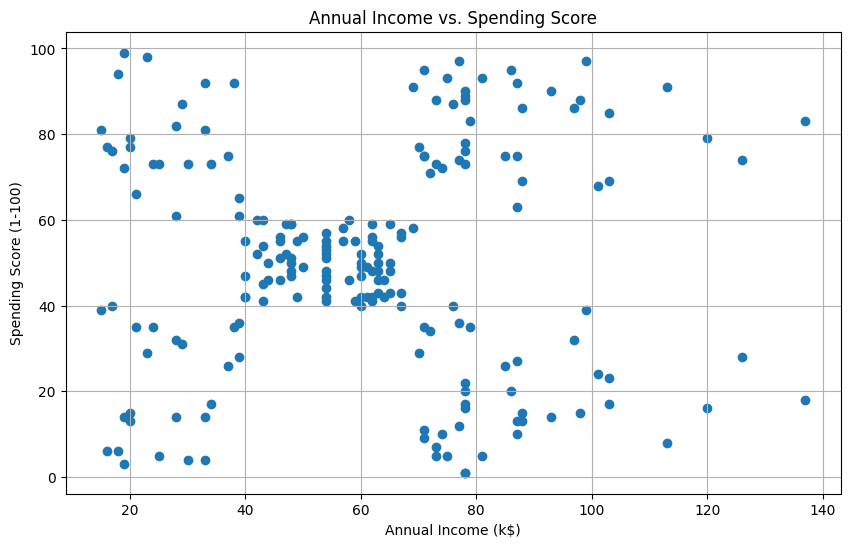

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X['AnnualIncome'], X['SpendingScore'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.grid(True)
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

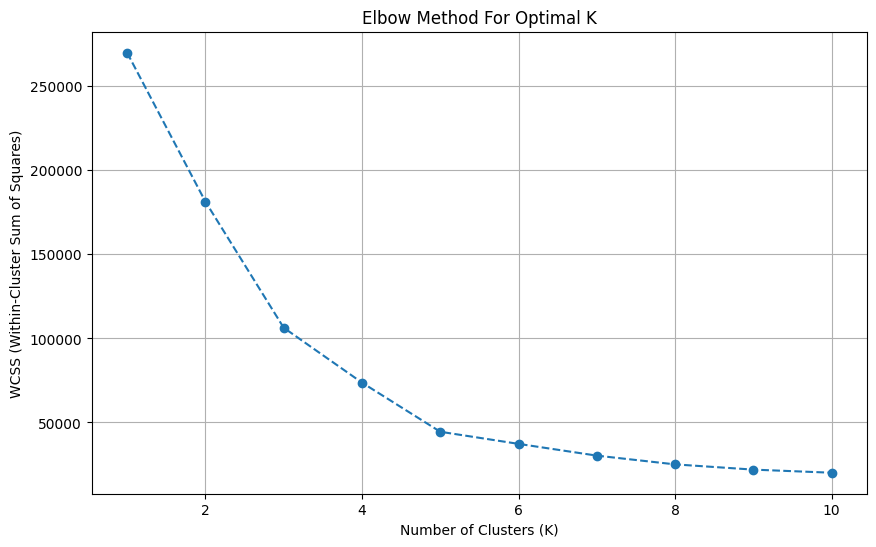

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # Added n_init=10 to suppress warning
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [27]:
# Based on the elbow method, K=5 seems optimal
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

X_labeled = X.copy()
X_labeled['Cluster'] = y_kmeans

print("First 10 rows with assigned clusters:")
print(X_labeled.head(10))

First 10 rows with assigned clusters:
   AnnualIncome  SpendingScore  Cluster
0            15             39        4
1            15             81        2
2            16              6        4
3            16             77        2
4            17             40        4
5            17             76        2
6            18              6        4
7            18             94        2
8            19              3        4
9            19             72        2


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

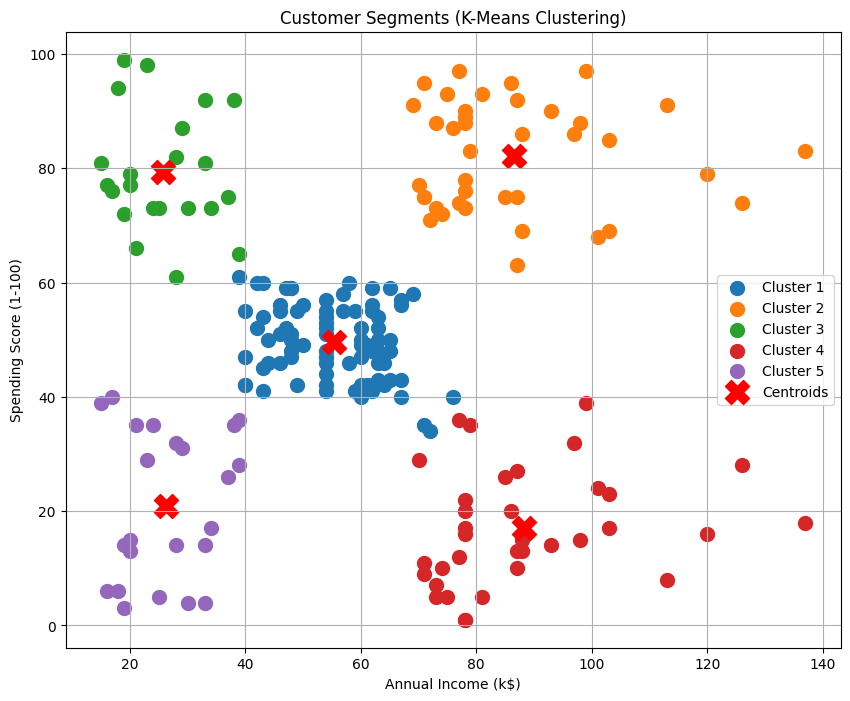

In [29]:
plt.figure(figsize=(10, 8))

# Plotting each cluster
for i in range(k):
    plt.scatter(X_labeled[X_labeled['Cluster'] == i]['AnnualIncome'],
                X_labeled[X_labeled['Cluster'] == i]['SpendingScore'],
                s = 100, label = f'Cluster {i+1}')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 300, c = 'red', marker = 'X', label = 'Centroids')

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

In [ ]:
# put your answer here

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [31]:
from mpl_toolkits.mplot3d import Axes3D

X_3d = df[['Age', 'AnnualIncome', 'SpendingScore']]

# Using the same optimal K as determined by the elbow method for 2D data (K=5)
k_3d = 5
kmeans_3d = KMeans(n_clusters=k_3d, init='k-means++', random_state=42, n_init=10)
y_kmeans_3d = kmeans_3d.fit_predict(X_3d)

X_3d_labeled = X_3d.copy()
X_3d_labeled['Cluster'] = y_kmeans_3d

print("First 10 rows of 3D data with assigned clusters:")
print(X_3d_labeled.head(10))

First 10 rows of 3D data with assigned clusters:
   Age  AnnualIncome  SpendingScore  Cluster
0   19            15             39        0
1   21            15             81        4
2   20            16              6        0
3   23            16             77        4
4   31            17             40        0
5   22            17             76        4
6   35            18              6        0
7   23            18             94        4
8   64            19              3        0
9   30            19             72        4


Visualize using a 3D scatter plot. `(5 pts)`

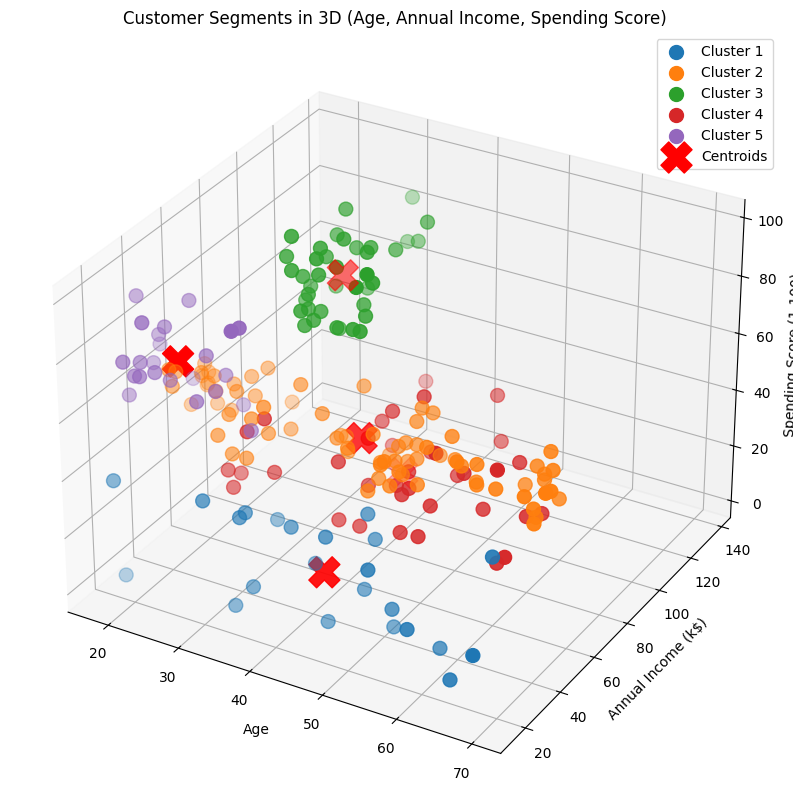

In [32]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting each cluster
for i in range(k_3d):
    ax.scatter(X_3d_labeled[X_3d_labeled['Cluster'] == i]['Age'],
               X_3d_labeled[X_3d_labeled['Cluster'] == i]['AnnualIncome'],
               X_3d_labeled[X_3d_labeled['Cluster'] == i]['SpendingScore'],
               s = 100, label = f'Cluster {i+1}')

# Plotting the centroids
ax.scatter(kmeans_3d.cluster_centers_[:, 0],
           kmeans_3d.cluster_centers_[:, 1],
           kmeans_3d.cluster_centers_[:, 2],
           s = 500, c = 'red', marker = 'X', label = 'Centroids')

ax.set_title('Customer Segments in 3D (Age, Annual Income, Spending Score)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

Are there meaningful and distinguishable clusters?
 Yes, the 3D visualization reveals meaningful and generally distinguishable clusters. While there might be some overlap, particularly between certain groups, the distinct centroids and spatial separation suggest that K-Means has identified different customer behaviors when considering age alongside income and spending habits. The clusters appear to represent specific customer profiles rather than a random distribution.

What business insights can you derive from the clusters in 3D? Adding 'Age' provides a richer understanding of customer segments:

Young High Spenders: One cluster might emerge as younger customers (e.g., 20s-30s) with moderate to high income but very high spending scores. These could be fashion-conscious young adults willing to spend on trends.
Middle-Aged Affluent Savers: Another cluster might show middle-aged customers (e.g., 40s-50s) with high annual income but lower spending scores. These could be established professionals who are more conservative in their spending at the mall, perhaps prioritizing savings or spending elsewhere.

Older Value Shoppers: There might be a cluster of older customers (e.g., 60+) with lower annual income and lower spending scores. This group might be looking for essentials or discounted items.

Balanced Spenders: A large cluster of customers with average age, income, and spending scores, representing the general customer base.
Targeted Marketing based on Age: Marketing strategies can now be more nuanced. For instance:

For young high-spenders, focus on trendy products, social media campaigns, and events.

For middle-aged affluent savers, promotions could highlight luxury goods, quality, and exclusive services, or focus on categories where they are more likely to spend (e.g., home goods, dining).

For older value shoppers, emphasize comfort, practicality, and senior discounts. This allows for truly personalized campaigns that consider not just their purchasing power and habits, but also their life stage and likely preferences.